In [1]:
import os
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.5f' % x)
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
from scipy import stats
from scipy.stats import skew, kurtosis
warnings.filterwarnings('ignore')

%matplotlib inline

if os.name == 'posix': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif os.name == 'nt': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정

# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [2]:
data = pd.read_csv('dataset2.csv').copy()
new_data = pd.read_csv('dataset2019.csv').copy()

### 새로운 데이터의 당뇨 비율

비율 : 0.043966593069021793


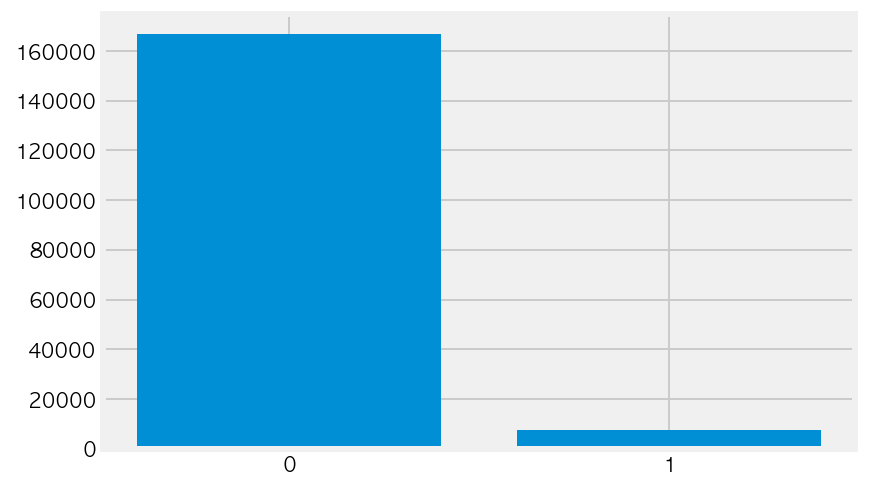

In [4]:
dang = new_data[new_data['당뇨여부']== 1].copy()
nodang = new_data[new_data['당뇨여부']== 0].copy()


plt.bar(np.arange(2),[len(nodang),len(dang)])
plt.xticks(np.arange(2),['0','1'])

print("비율 :",len(dang)/len(nodang))

In [5]:
from imblearn.under_sampling import RandomUnderSampler

def UnderSampling(ss):
    rus = RandomUnderSampler(sampling_strategy = ss)

    x_rus, y_rus = rus.fit_resample(X, Y)
    
    return x_rus, y_rus

In [6]:
X = data[['성별코드', '연령대코드(5세단위)', '신장(5Cm단위)', '체중(5Kg단위)', '허리둘레', '시력(좌)',
       '시력(우)', '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압', '총콜레스테롤',
       '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백', '혈청크레아티닌',
       '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태', '음주여부', 'BMI']].copy()
Y = data[['당뇨여부']].copy()

In [7]:
print("원본 데이터 당뇨 수", pd.get_dummies(Y).sum())

x_rus, y_rus = UnderSampling(0.8)


print("랜덤 언더 샘플링(0.8) 후, 비당뇨 수(auto) ->",len(y_rus[y_rus['당뇨여부']==0]))
print("비율 :",len(y_rus[y_rus['당뇨여부']==1])/(len(y_rus[y_rus['당뇨여부']==0])))


원본 데이터 당뇨 수 당뇨여부   46579.00000
dtype: float64
랜덤 언더 샘플링(0.8) 후, 비당뇨 수(auto) -> 58223
비율 : 0.8000103052058465


In [8]:
def showbar(df_y): 
    dang = df_y[df_y['당뇨여부']== 1].copy()
    nodang = df_y[df_y['당뇨여부']== 0].copy()

    plt.bar(np.arange(2),[len(nodang),len(dang)])
    plt.xticks(np.arange(2),['0','1'])

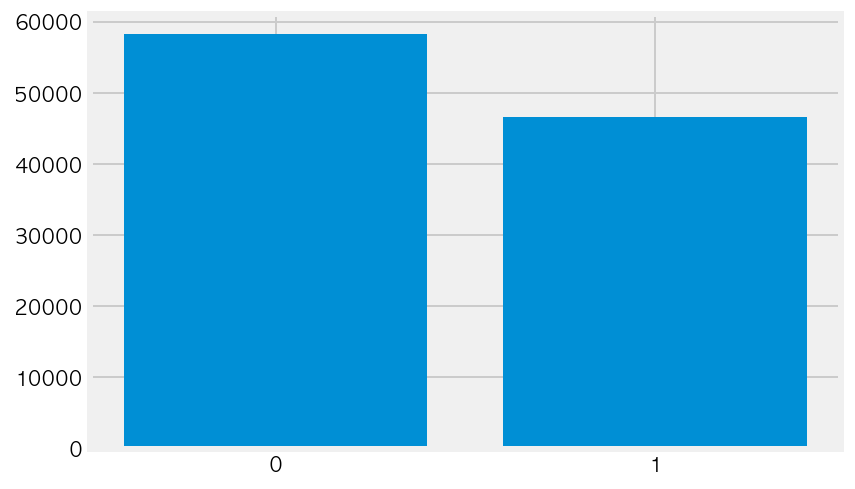

In [9]:
showbar(y_rus)

# Logistic Regression 


: Randomstate = 42, PBL1에서 정한 속성으로 진행

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [11]:
#PBL1에서 정한 속성으로 진행
x_rus = x_rus[['허리둘레','연령대코드(5세단위)','감마지티피','수축기혈압','이완기혈압','(혈청지오티)ALT','(혈청지오티)AST','BMI']].copy()
y_rus = y_rus[['당뇨여부']].copy()

x_train, x_test, y_train, y_test = train_test_split(x_rus, y_rus, random_state=42, shuffle=True, stratify = y_rus, test_size=0.2)

In [12]:
S_scaler = StandardScaler()

In [13]:
s_x_train = S_scaler.fit_transform(x_train)
s_x_test= S_scaler.transform(x_test)

In [14]:
# 가장 높은 값은 값으로 진행하자

from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, classification_report


C = [0.01, 0.1, 1, 100,1000]
penalty = ['l1','l2']
for c in C:
    for p in penalty:
        logreg = LogisticRegression(C=c,penalty=p,solver='liblinear',max_iter=1000)
        logreg.fit(s_x_train,y_train)
        y_pred = logreg.predict(s_x_test)
        acc_score = accuracy_score(y_test,y_pred)
        print("C: {}, penalty: {}, accuracy: {}".format(c,p,acc_score))
        print(classification_report(y_test,y_pred))

C: 0.01, penalty: l1, accuracy: 0.6863222174514575
              precision    recall  f1-score   support

         0.0       0.71      0.74      0.72     11645
         1.0       0.65      0.63      0.64      9316

    accuracy                           0.69     20961
   macro avg       0.68      0.68      0.68     20961
weighted avg       0.69      0.69      0.69     20961

C: 0.01, penalty: l2, accuracy: 0.6867992939268165
              precision    recall  f1-score   support

         0.0       0.71      0.74      0.72     11645
         1.0       0.65      0.62      0.64      9316

    accuracy                           0.69     20961
   macro avg       0.68      0.68      0.68     20961
weighted avg       0.69      0.69      0.69     20961

C: 0.1, penalty: l1, accuracy: 0.6867992939268165
              precision    recall  f1-score   support

         0.0       0.71      0.74      0.72     11645
         1.0       0.65      0.62      0.64      9316

    accuracy                  

## 예측모델 생성 (C=1, Penalty='l2')

In [15]:
logreg = LogisticRegression(C=1,penalty='l2',solver='liblinear',max_iter=1000)
logreg.fit(s_x_train,y_train)
y_pred = logreg.predict(s_x_test)

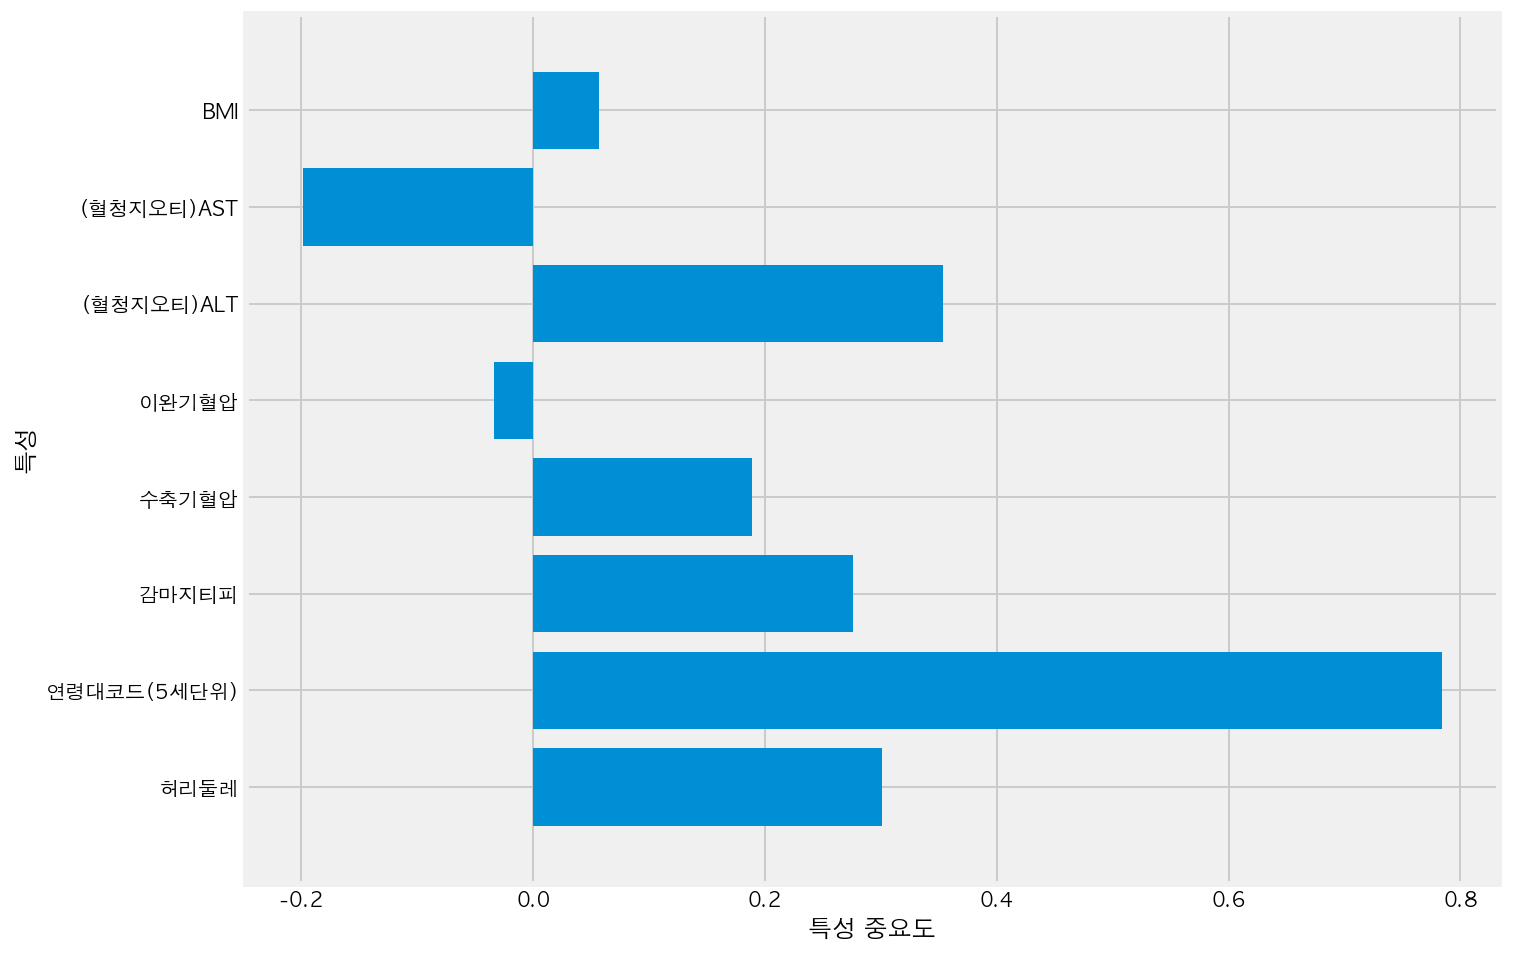

In [16]:
def plot_model(model):
    n_features = len(x_rus.columns)
    feature_names = x_rus.columns
    
    plt.figure(figsize = (10,8))
    coef = model.coef_.reshape(-1,)
    plt.barh(np.arange(n_features),coef, align="center")
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

plot_model(logreg)

In [17]:
keywords = pd.DataFrame(logreg.coef_, columns = x_rus.columns)
keywords.T.sort_values(by=0,ascending=False)

,0
연령대코드(5세단위),0.78388
(혈청지오티)ALT,0.35384
허리둘레,0.30051
감마지티피,0.27573
수축기혈압,0.18907
BMI,0.05658
이완기혈압,-0.03395
(혈청지오티)AST,-0.19875


# VIF 체크

In [18]:
from patsy import dmatrices
import statsmodels.api as sm;
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import ols

%matplotlib inline

In [19]:
mydata = pd.concat([x_rus,y_rus],axis = 1)
mydata.rename(columns = {"연령대코드(5세단위)": "연령대코드", "(혈청지오티)AST": "AST","(혈청지오티)ALT" : "ALT"}, inplace =True)
mydata.columns
mydata

,허리둘레,연령대코드,감마지티피,수축기혈압,이완기혈압,ALT,AST,BMI,당뇨여부
0,78.00000,16,18.00000,100.00000,60.00000,18.00000,22.00000,27.00000,0.00000
1,74.40000,9,15.00000,112.00000,70.00000,23.00000,18.00000,23.00000,0.00000
2,88.00000,7,153.00000,130.00000,70.00000,22.00000,18.00000,24.00000,0.00000
3,64.00000,6,19.00000,107.00000,69.00000,8.00000,11.00000,21.00000,0.00000
4,86.00000,6,48.00000,122.00000,81.00000,42.00000,25.00000,28.00000,0.00000
...,...,...,...,...,...,...,...,...,...
104797,85.00000,13,19.00000,128.00000,79.00000,19.00000,20.00000,24.00000,1.00000
104798,77.00000,12,27.00000,116.00000,72.00000,17.00000,22.00000,21.00000,1.00000
104799,87.00000,16,24.00000,123.00000,72.00000,28.00000,21.00000,26.00000,1.00000
104800,87.00000,13,17.00000,130.00000,80.00000,15.00000,19.00000,27.00000,1.00000


In [20]:
model = ols('당뇨여부 ~ 허리둘레+연령대코드+감마지티피+수축기혈압+이완기혈압+ALT+AST+BMI',mydata)
res = model.fit()
pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model.exog, i)} 
             for i, column in enumerate(model.exog_names)
             if column != 'Intercept')  # 절편의 VIF는 구하지 않는다.

,컬럼,VIF
0,허리둘레,2.87093
1,연령대코드,1.24431
2,감마지티피,1.38042
3,수축기혈압,2.17904
4,이완기혈압,2.02010
5,ALT,2.63080
6,AST,2.32780
7,BMI,2.65534


VIF(Variance_inflation_factor)의 수치 10 이상의 속성은 없다.

<AxesSubplot:>

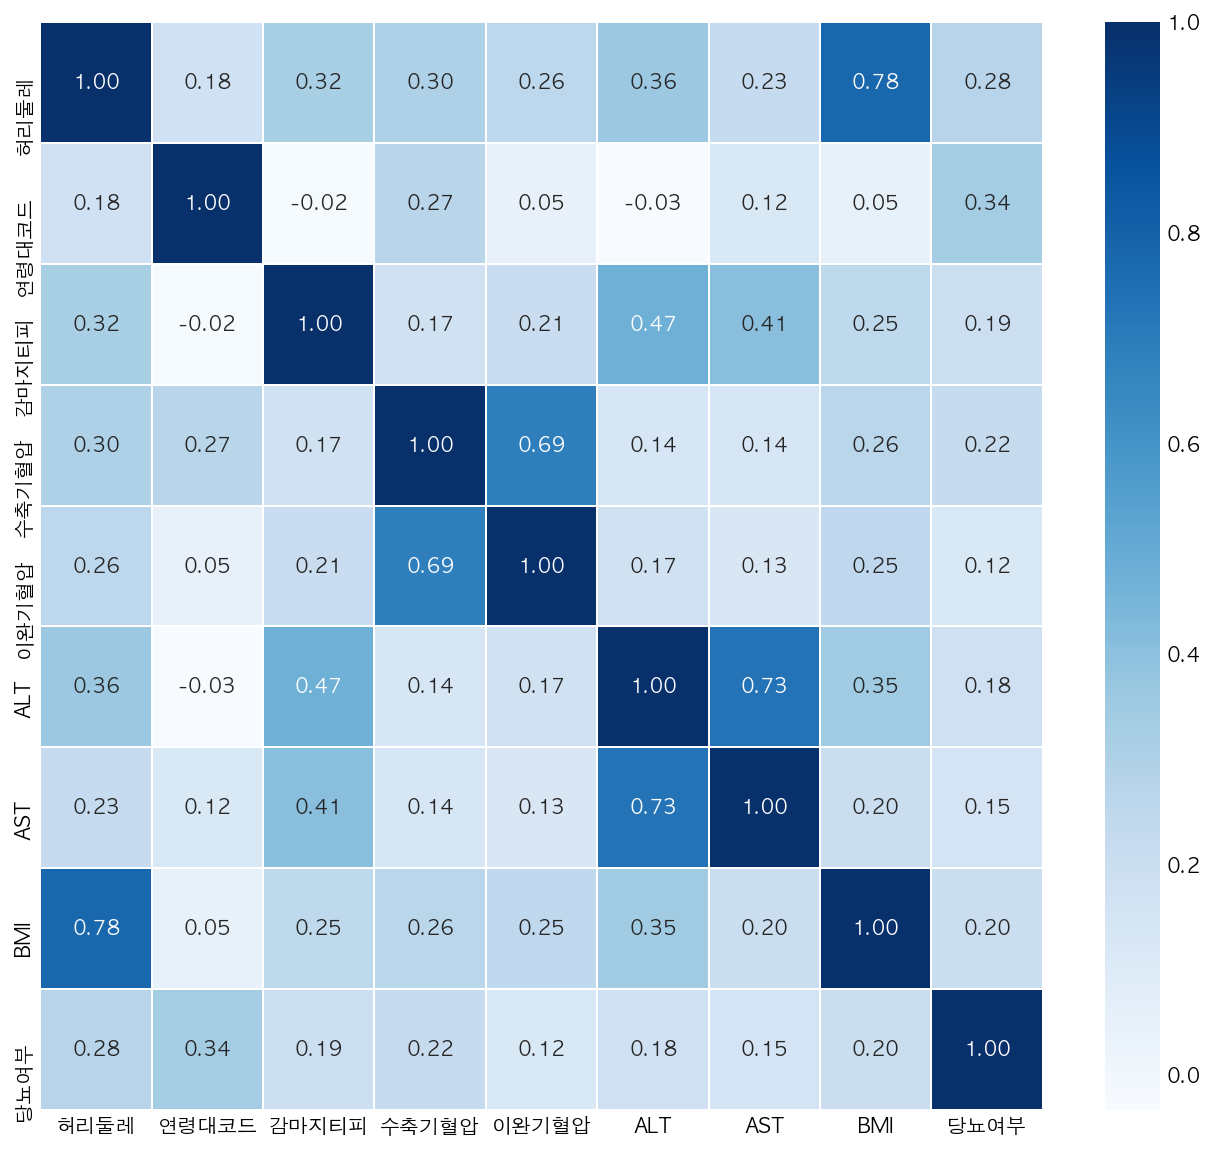

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(data = mydata.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

다중공선성은 해결되었지만, 허리둘레와 BMI가 비교적 높은 상관관계를 갖기 때문에 둘 중 하나만 쓰도록 하자.

In [22]:
# C: 1, penalty: l2, accuracy: 0.7045914278080989

acc_score = accuracy_score(y_test,y_pred)
auc = roc_auc_score(y_test, logreg.predict_proba(s_x_test)[:, 1])

print("acc_score: ",acc_score, "AUC: ",auc)

acc_score:  0.6871332474595677 AUC:  0.7583689589013467


In [23]:
## coefficients 값 확인
## '허리둘레','연령대코드(5세단위)','감마지티피','수축기혈압','이완기혈압','(혈청지오티)ALT','(혈청지오티)AST','BMI'
print(logreg.coef_)

[[ 0.30050685  0.78387923  0.27573371  0.18906574 -0.03395495  0.35384338
  -0.19874807  0.05657775]]


## TP FP FN FP 확인

In [24]:
is_correct = y_pred == y_test.values
print(is_correct)

[[False  True False ... False False False]
 [False  True False ... False False False]
 [ True False  True ...  True  True  True]
 ...
 [False  True False ... False False False]
 [False  True False ... False False False]
 [False  True False ... False False False]]


In [25]:
np.mean(is_correct)

0.5084203997900864

In [26]:
print(len(y_test))
print(sum(y_test.values))
print(np.sum(y_pred))


20961
[9316.]
8892.0


In [27]:
from sklearn import metrics


In [28]:
metrics.confusion_matrix(y_test,y_pred)  #[[TN, FP][FN, TP]]

array([[8578, 3067],
       [3491, 5825]])

In [29]:
# P = sum(y_test08)
# TP = sum((y_test08==1) & (y_pred08 ==1))
# TPR = TP/P

# FN = sum((y_test08==1) & (y_pred08 == 0))
# FNR = FN / P

# N =sum(y_pred08 == 0)

# print(P)
# print(TP)
# print(TPR)
# print(FN)
# print(FNR)

(tn, fp, fn, tp) = metrics.confusion_matrix(y_test, y_pred).ravel()

print(tn,fp,fn,tp)


8578 3067 3491 5825


## Fall-out , Precision, Recall, F1_score

In [30]:
## Fall-out 
fpr = fp / (tn+fp)
print("Fallout: ", fpr)


## Precision

precision = tp / (tp+fp)
print("Precision: ",precision)

## Recall

recall = tp / (tp+fn)
print("Recall: ",recall)

## F1 score

f_score = (precision * recall * 2) / (precision + recall)
print("F score: ",f_score)



Fallout:  0.26337483898668956
Precision:  0.6550832208726945
Recall:  0.6252683555173895
F score:  0.6398286467486819


In [31]:
## ROC curve

    
def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음. 
    fprs , tprs , thresholds = metrics.roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림. 
    plt.plot([0, 1], [0, 1], "k--", label='Random')
  
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
  



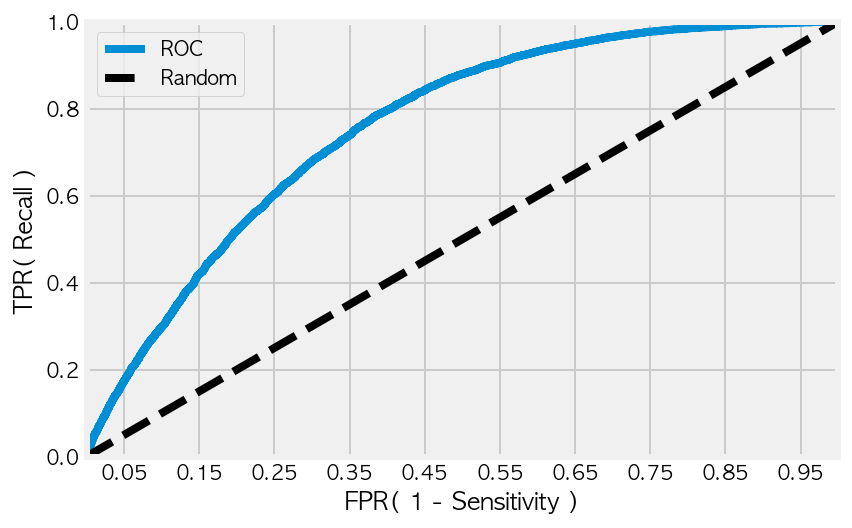

In [32]:
# lr_proba = lr08.predict_proba(r_x_test08)[:, 1]

# roc_curve_plot(y_test, lr_proba)

roc_curve_plot(y_test, logreg.predict_proba(s_x_test)[:, 1]) 


## AUC 

In [33]:

roc_auc = metrics.roc_auc_score(y_test, logreg.predict_proba(s_x_test)[:, 1])

print('ROC/AUC VAL: {0:.4f}'.format(roc_auc))

ROC/AUC VAL: 0.7584


In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.71      0.74      0.72     11645
         1.0       0.66      0.63      0.64      9316

    accuracy                           0.69     20961
   macro avg       0.68      0.68      0.68     20961
weighted avg       0.69      0.69      0.69     20961



(0.0, 1.0)

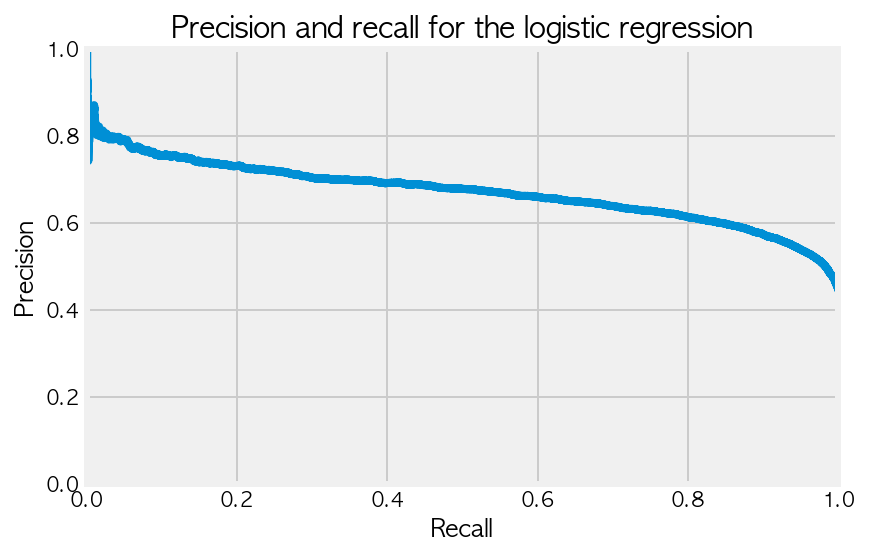

In [35]:
precision, recall, thresh_3 = \
metrics.precision_recall_curve(y_test, logreg.predict_proba(s_x_test)[:, 1])

plt.plot(recall, precision, '-')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision and recall for the logistic regression')
plt.xlim([0, 1])
plt.ylim([0, 1])

## 2019년 데이터 넣어보기

In [36]:
new_data
new_data.columns

Index(['성별코드', '연령대코드(5세단위)', '신장(5Cm단위)', '체중(5Kg단위)', '허리둘레', '시력(좌)',
       '시력(우)', '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤',
       '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백', '혈청크레아티닌',
       '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태', '음주여부', '당뇨여부', 'BMI'],
      dtype='object')

In [37]:
new_data.rename(columns = {"신장(5Cm단위)":'신장', "연령대 코드(5세단위)":"연령대코드(5세단위)","체중(5Kg 단위)":'체중', '수축기 혈압':"수축기혈압", '이완기 혈압':"이완기혈압", '총 콜레스테롤':"총콜레스테롤",'HDL 콜레스테롤':"HDL콜레스테롤", 'LDL 콜레스테롤':"LDL콜레스테롤", '감마 지티피':"감마지티피"}, inplace =True)
testdata_x = new_data[['허리둘레','연령대코드(5세단위)','감마지티피','수축기혈압','이완기혈압','(혈청지오티)ALT','(혈청지오티)AST','BMI']].copy()
testdata_y = new_data[['당뇨여부']].copy()

In [38]:
s_x_td= S_scaler.transform(testdata_x)

In [39]:
td_y_pred = logreg.predict(s_x_td)

In [41]:
print(classification_report(testdata_y,td_y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.74      0.85    166672
         1.0       0.10      0.63      0.17      7328

    accuracy                           0.74    174000
   macro avg       0.54      0.69      0.51    174000
weighted avg       0.94      0.74      0.82    174000



In [42]:
is_correct = td_y_pred == testdata_y.values
print(is_correct)

[[ True  True  True ...  True False  True]
 [ True  True  True ...  True False  True]
 [ True  True  True ...  True False  True]
 ...
 [ True  True  True ...  True False  True]
 [ True  True  True ...  True False  True]
 [False False False ... False  True False]]


In [43]:
print(len(testdata_y))
print(sum(testdata_y.values))
np.sum(td_y_pred)

174000
[7328.]


47331.0

In [44]:
(tn, fp, fn, tp) = metrics.confusion_matrix(testdata_y, td_y_pred).ravel()

print(tn,fp,fn,tp)

123953 42719 2716 4612


In [45]:
## Fall-out 
fpr = fp / (tn+fp)
print("Fallout: ", fpr)


## Precision

precision = tp / (tp+fp)
print("Precision: ",precision)

## Recall

recall = tp / (tp+fn)
print("Recall: ",recall)

## F1 score

f_score = (precision * recall * 2) / (precision + recall)
print("F score: ",f_score)



Fallout:  0.25630579821445715
Precision:  0.09744142316874775
Recall:  0.6293668122270742
F score:  0.16875537422931264


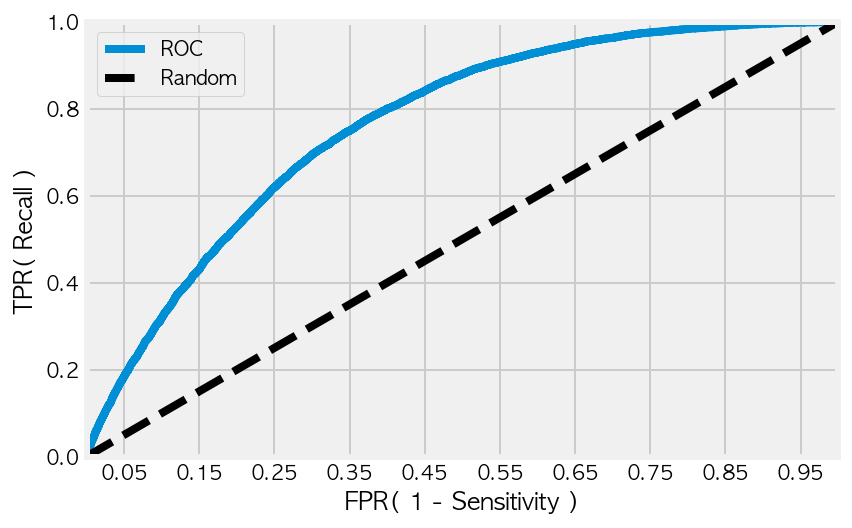

In [46]:
roc_curve_plot(testdata_y, logreg.predict_proba(s_x_td)[:, 1]) 


In [47]:
roc_auc = metrics.roc_auc_score(testdata_y, logreg.predict_proba(s_x_td)[:, 1])

print('ROC/AUC VAL: {0:.4f}'.format(roc_auc))

ROC/AUC VAL: 0.7629


(0.0, 1.0)

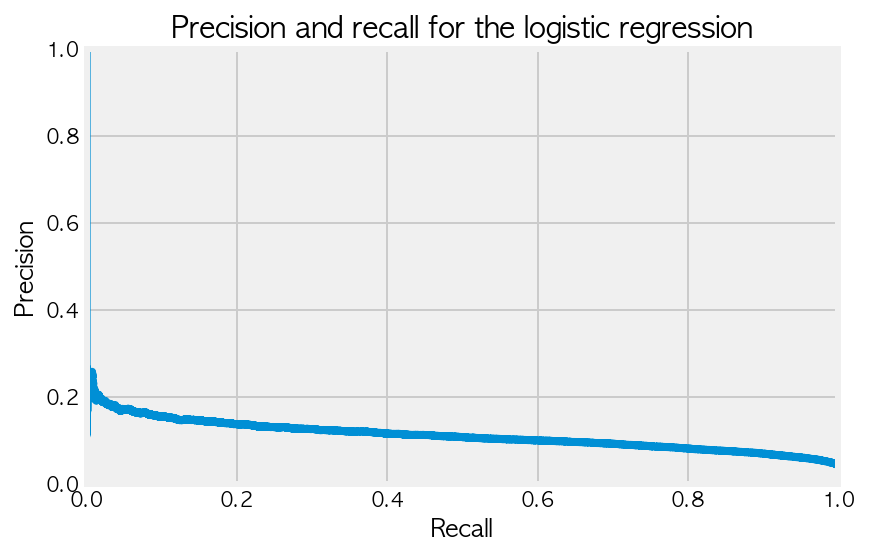

In [48]:
precision, recall, thresh_3 = \
metrics.precision_recall_curve(testdata_y, logreg.predict_proba(s_x_td)[:, 1])

plt.plot(recall, precision, '-')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision and recall for the logistic regression')
plt.xlim([0, 1])
plt.ylim([0, 1])

## 위 결과의 이유
 : 당뇨 여부 0과 1의 비율이 96% : 4%로 1의 갯수가 매우 적다. 이렇다면 0을 1로 예측하는 경우의 수가 많아져 당연히 프리시전 수치가 낮아질 것이라고 생각했다. 따라서 2019년의 데이터 셋도 당뇨/비당뇨의 비율을 1:1로 하고 진행해보자.

In [53]:
rus = RandomUnderSampler(sampling_strategy = 1)

x_rus2019, y_rus2019 = rus.fit_resample(testdata_x, testdata_y)



In [54]:
s_x_2019= S_scaler.transform(x_rus2019)
y_pred2019 = logreg.predict(s_x_2019)
print(classification_report(y_rus2019,y_pred2019))

              precision    recall  f1-score   support

         0.0       0.67      0.74      0.70      7328
         1.0       0.71      0.63      0.67      7328

    accuracy                           0.69     14656
   macro avg       0.69      0.69      0.68     14656
weighted avg       0.69      0.69      0.68     14656



In [55]:
(tn, fp, fn, tp) = metrics.confusion_matrix(y_rus2019, y_pred2019).ravel()

print(tn,fp,fn,tp)

5430 1898 2716 4612


In [56]:
## Fall-out 
fpr = fp / (tn+fp)
print("Fallout: ", fpr)


## Precision

precision = tp / (tp+fp)
print("Precision: ",precision)

## Recall

recall = tp / (tp+fn)
print("Recall: ",recall)

## F1 score

f_score = (precision * recall * 2) / (precision + recall)
print("F score: ",f_score)

Fallout:  0.2590065502183406
Precision:  0.7084485407066052
Recall:  0.6293668122270742
F score:  0.6665703136291371


(0.0, 1.0)

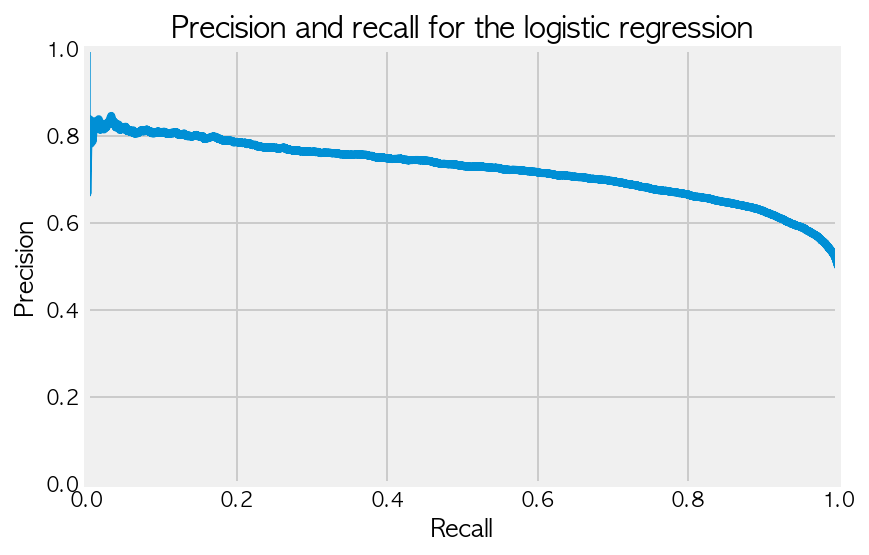

In [57]:
precision, recall, thresh_3 = \
metrics.precision_recall_curve(y_rus2019, logreg.predict_proba(s_x_2019)[:, 1])

plt.plot(recall, precision, '-')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision and recall for the logistic regression')
plt.xlim([0, 1])
plt.ylim([0, 1])

예상대로 테스트 샘플의 당뇨/비당뇨 수치를 1:1로 하니 정상적인 프리시전 리콜 수치가 나왔다.

결론 : 0의 갯수가 많은 데이터(비당뇨 수가 많은)를 모델에 넣으면 당연히 Precision이 낮은 수치가 나오는 것임